<a href="https://colab.research.google.com/github/RajanVishnoi/CAR-PRICE-PREDICTION/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**First let us find all the categorical features**

In [ ]:
for feature in df.columns:
  if len(df[feature].unique())<8:
    print(feature ,':' , df[feature].unique())

Fuel_Type : ['Petrol' 'Diesel' 'CNG']
Seller_Type : ['Dealer' 'Individual']
Transmission : ['Manual' 'Automatic']
Owner : [0 1 3]


In [ ]:
#missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#creating a new column having number of years of ownership of a car
df['current_year']=2020
df['no_year']=df['current_year']-df['Year']

In [ ]:
#droping the useless columns
df.drop(['Year','current_year','Car_Name'],axis=1,inplace=True)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [ ]:
#encoding categocal features numerically
final_df=pd.get_dummies(df,drop_first=True)

In [ ]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [ ]:
#finding correlation between the features
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

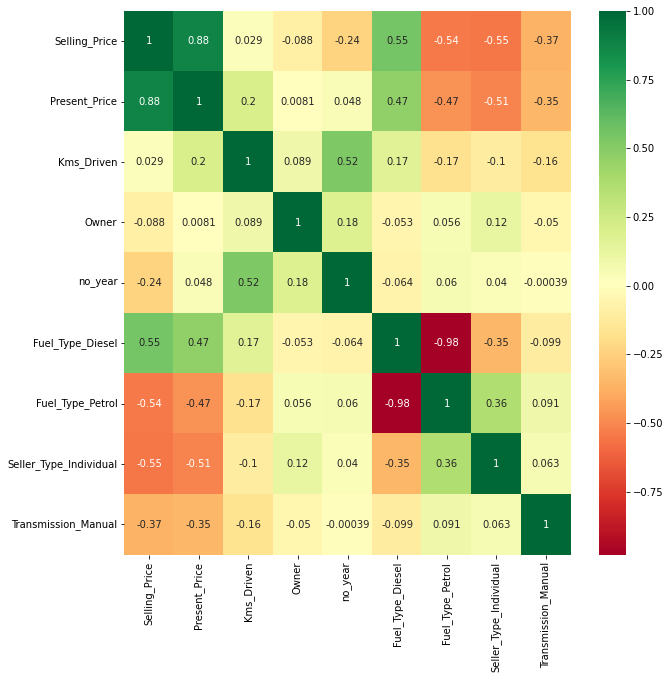

In [ ]:
corr=final_df.corr()
top_corr_features=corr.index
plt.figure(figsize=(10,10))
#plotting heatmap
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [ ]:
x=final_df.drop(['Selling_Price'], axis=1)
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [ ]:
y=final_df[['Selling_Price']]
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [ ]:
#feature importances
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.39962943 0.03919234 0.00051543 0.07942807 0.22433903 0.00771757
 0.12009763 0.1290805 ]


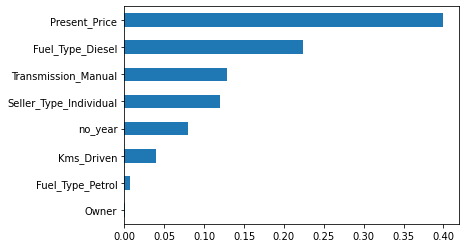

In [ ]:
imp_features=pd.Series(model.feature_importances_,index=x.columns)
imp_features.sort_values().plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
x_train.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
263,7.70,16002,0,4,0,1,0,1
19,7.98,41442,0,10,0,1,0,1
14,7.21,77427,0,11,0,1,0,1
91,16.09,58242,0,6,1,0,0,1
211,14.79,43535,0,5,1,0,0,1


In [ ]:
y_train.head()

,Selling_Price
263,6.60
19,2.65
14,2.25
91,11.25
211,11.75


**Hyperparameter tuning to find the best performing combination of hyperparameters**

In [ ]:
import numpy as np
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]

#maximum depth of trees
max_depth=[int(x) for x in np.linspace(start=5,stop=30, num=6)]

#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [ ]:
#using randomisedsearchCV
best_params={'n_estimators':n_estimators,
             'max_depth':max_depth,
             'min_samples_leaf':min_samples_leaf}

print(best_params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=best_params,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42,n_jobs=1)


In [ ]:
rf_random.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
y_pred=rf_random.predict(x_test)

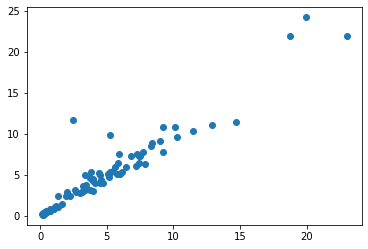

In [ ]:
plt.scatter(y_test,y_pred)

From above graph we can clearly see that our test values and predicted values are almost linear with each other hence our model is performing very well.

In [ ]:
from sklearn.metrics import mean_squared_error as mse
rmse=mse(y_test,y_pred)**(1/2)
print(rmse)

1.4070727833670542


also the root mean squared error of our model is very low so here also our model performed very well